In [1]:
import marimo as mo
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math
import seaborn as sns

## 1. Import Library

## 2. Import the Dataset

In [2]:
data_weather = pd.read_csv("weatherHistory.csv")
data_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 3. Exploratory Data Analysis

### a. Check Missing Value

In [3]:
data_weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### b. Check Data Information

In [4]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### c. Check Description Dataset

In [5]:
data_weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### d. Dataset Visualization

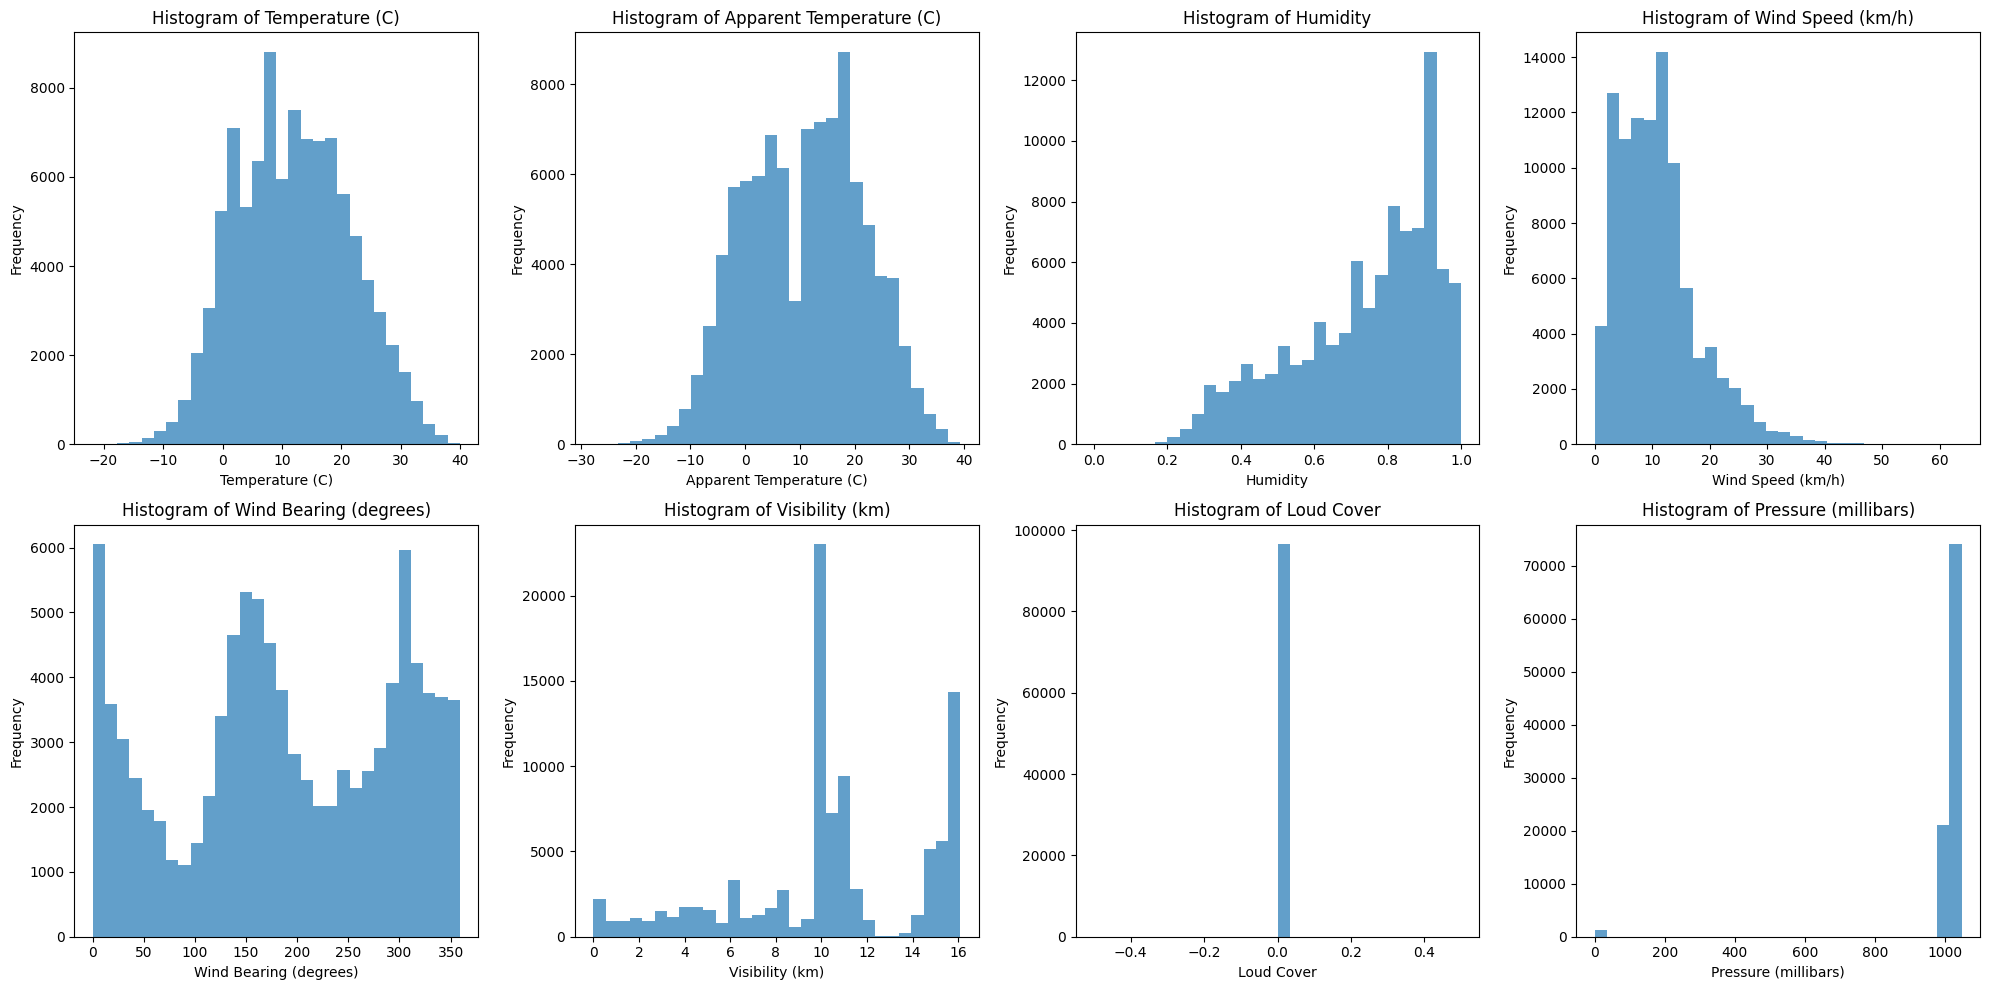

In [6]:
cols = data_weather.select_dtypes(include='number').columns

n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, item in enumerate(cols):
    axes[i].hist(data_weather[item].dropna(), bins=30, alpha=0.7)
    axes[i].set_title(f'Histogram of {item}')
    axes[i].set_xlabel(item)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Preprocessing

### a. Select The Required Attributes

In [7]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
data_weather_num = data_weather.drop(["Formatted Date", "Summary", "Daily Summary"], axis=1)

In [9]:
data_weather_num.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


### b. Handle Missing Value

In [10]:
data_weather_num.isnull().sum()

Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [11]:
data_weather_clean = data_weather_num.dropna()

In [12]:
data_weather_clean.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

### c. Split Dataset

In [13]:
from sklearn.model_selection import train_test_split

x = data_weather_clean.drop(columns=["Precip Type"])
y = data_weather_clean["Precip Type"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### d. Normalization Dataset

In [14]:
from sklearn.preprocessing import StandardScaler 

std_scaler = StandardScaler()

x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

## 5. Modelling Dataset

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
def performance(test, pred, model_name=""):
    print("Model Accuracy: ", accuracy_score(test, pred))
    print("Classification Report:", classification_report(test, pred))

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(test, pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - : {}".format(model_name))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### a. KNN

Model Accuracy:  0.9826454033771107
Classification Report:               precision    recall  f1-score   support

        rain       0.98      1.00      0.99     17090
        snow       0.97      0.87      0.92      2098

    accuracy                           0.98     19188
   macro avg       0.98      0.93      0.95     19188
weighted avg       0.98      0.98      0.98     19188



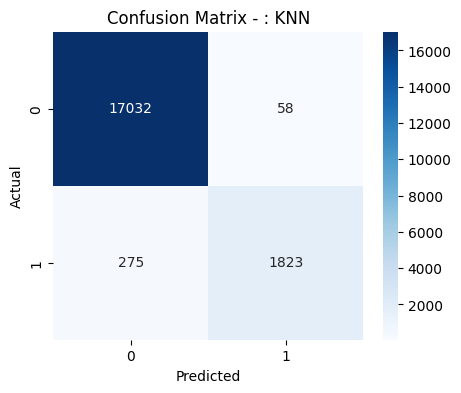

In [17]:
model_knn = KNeighborsClassifier(n_neighbors=2) 
model_knn.fit(x_train_scaled, y_train)

y_pred_knn = model_knn.predict(x_test_scaled)

performance(y_test, y_pred_knn, "KNN")

### b. Random Forest

Model Accuracy:  1.0
Classification Report:               precision    recall  f1-score   support

        rain       1.00      1.00      1.00     17090
        snow       1.00      1.00      1.00      2098

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



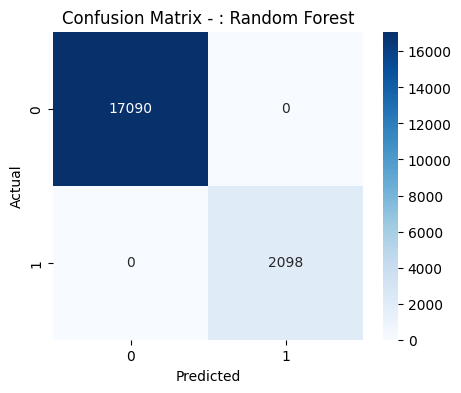

In [18]:
model_rf = RandomForestClassifier(
    n_estimators=200,        
    max_depth=None,          
    min_samples_leaf=1,      
    max_features='sqrt',     
    bootstrap=True,         
    random_state=42,
    n_jobs=-1                
)

model_rf.fit(x_train_scaled, y_train)

y_pred_rf = model_rf.predict(x_test_scaled)

performance(y_test, y_pred_rf, "Random Forest")

### c. Naive Bayes

Model Accuracy:  0.940744215134459
Classification Report:               precision    recall  f1-score   support

        rain       1.00      0.94      0.97     17090
        snow       0.66      0.96      0.78      2098

    accuracy                           0.94     19188
   macro avg       0.83      0.95      0.87     19188
weighted avg       0.96      0.94      0.95     19188



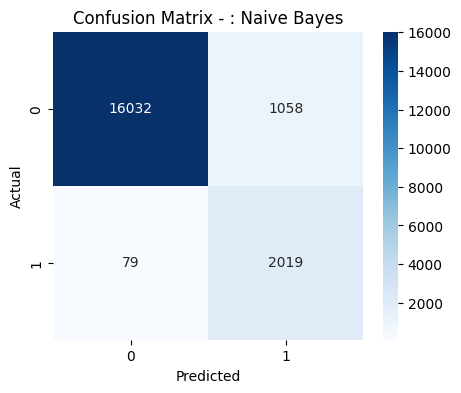

In [19]:
model_nb = GaussianNB()
model_nb.fit(x_train_scaled, y_train)

y_pred_bayes = model_nb.predict(x_test_scaled)

performance(y_test, y_pred_bayes, "Naive Bayes")

### d. Logistic Regression

Model Accuracy:  0.9929643527204502
Classification Report:               precision    recall  f1-score   support

        rain       1.00      0.99      1.00     17090
        snow       0.96      0.98      0.97      2098

    accuracy                           0.99     19188
   macro avg       0.98      0.99      0.98     19188
weighted avg       0.99      0.99      0.99     19188



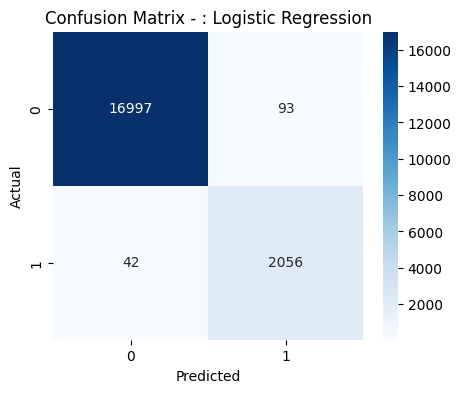

In [20]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train_scaled, y_train)

y_pred_logistic = model_logistic.predict(x_test_scaled)

performance(y_test, y_pred_logistic, "Logistic Regression")

## 6. Model Evaluation

### a. ROC-AUC Value

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)

In [22]:
y_score_knn = model_knn.predict_proba(x_test_scaled)[:, 1]
y_score_random = model_rf.predict_proba(x_test_scaled)[:, 1]
y_score_bayes = model_nb.predict_proba(x_test_scaled)[:, 1]
y_score_logistic = model_logistic.predict_proba(x_test_scaled)[:, 1]

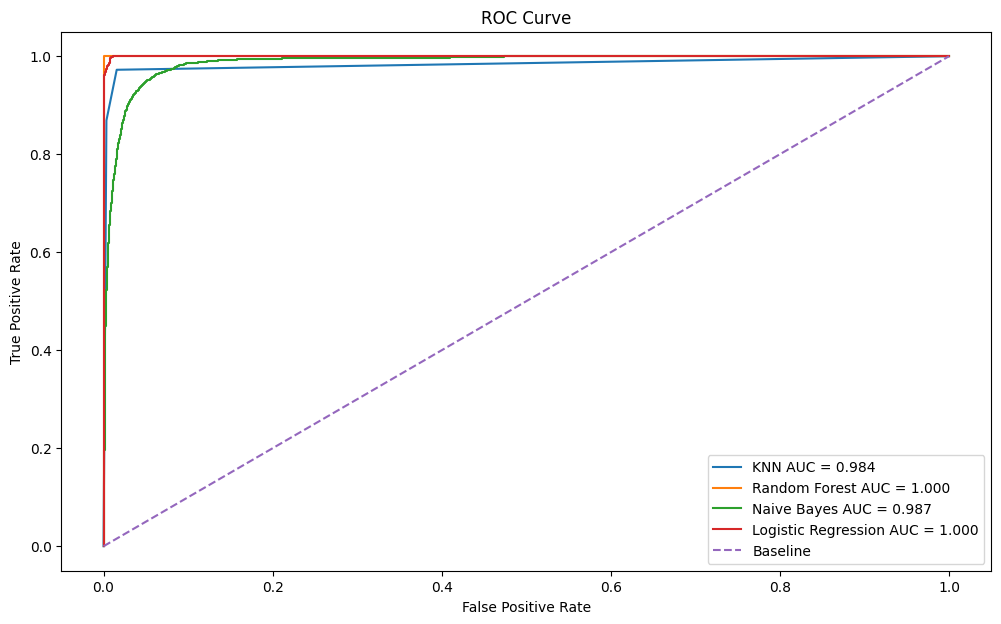

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

auc1 = roc_auc_score(y_test_enc, y_score_knn)
fpr1, tpr1, _ = roc_curve(y_test_enc, y_score_knn)

auc2 = roc_auc_score(y_test_enc, y_score_random)
fpr2, tpr2, _ = roc_curve(y_test_enc, y_score_random)

auc3 = roc_auc_score(y_test_enc, y_score_bayes)
fpr3, tpr3, _ = roc_curve(y_test_enc, y_score_bayes)

auc4 = roc_auc_score(y_test_enc, y_score_logistic)
fpr4, tpr4, _ = roc_curve(y_test_enc, y_score_logistic)

plt.figure(figsize=(12, 7))
plt.plot(fpr1, tpr1, label=f'KNN AUC = {auc1:.3f}')
plt.plot(fpr2, tpr2, label=f'Random Forest AUC = {auc2:.3f}')
plt.plot(fpr3, tpr3, label=f'Naive Bayes AUC = {auc3:.3f}')
plt.plot(fpr4, tpr4, label=f'Logistic Regression AUC = {auc4:.3f}')

plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### b. Learning Curve

In [26]:
def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train, y_train,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')

    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='orange', alpha=0.2)

    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Jumlah Data Latih')
    plt.ylabel('Akurasi')

    plt.ylim(0.8, 1.02) 
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

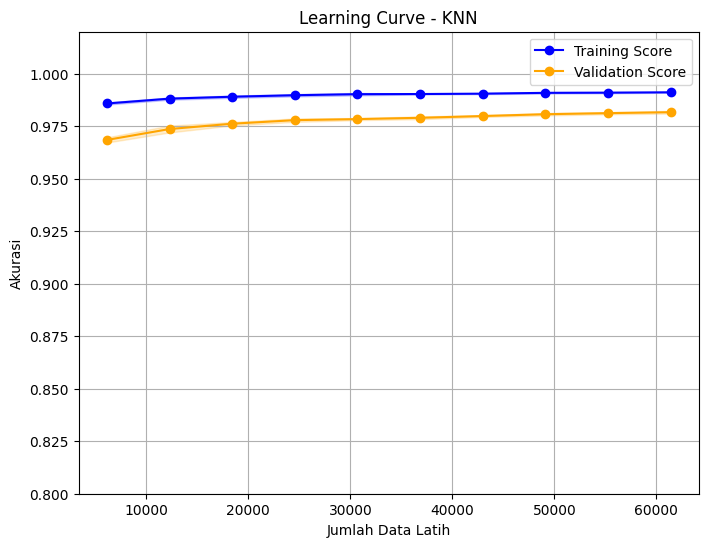

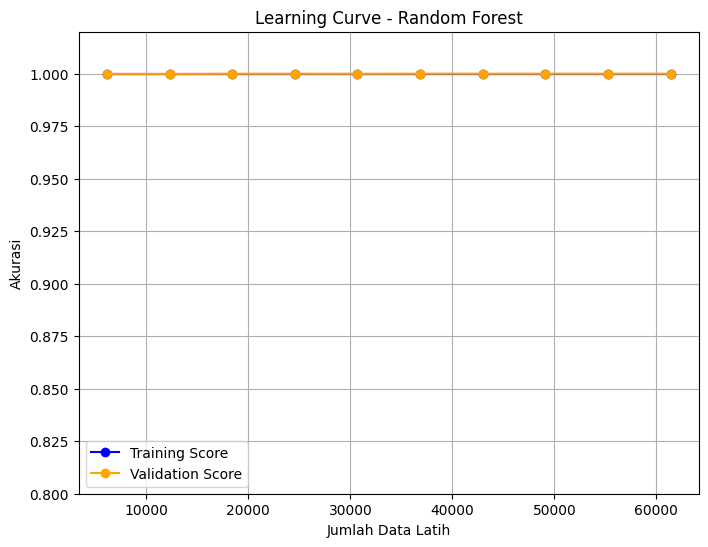

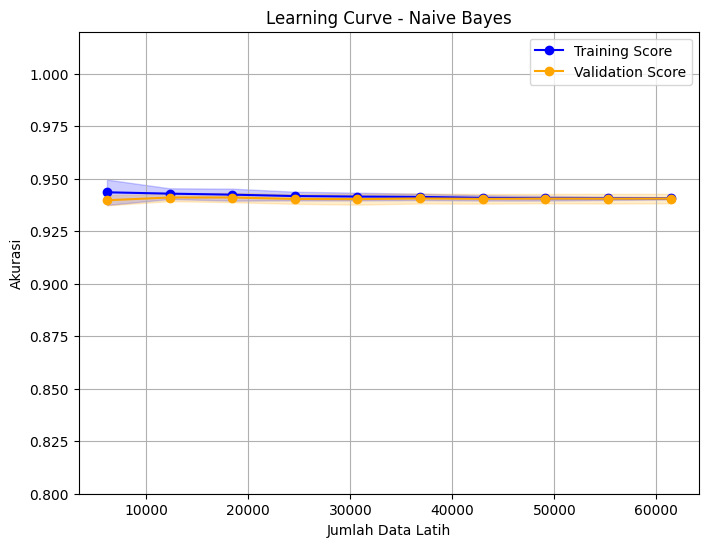

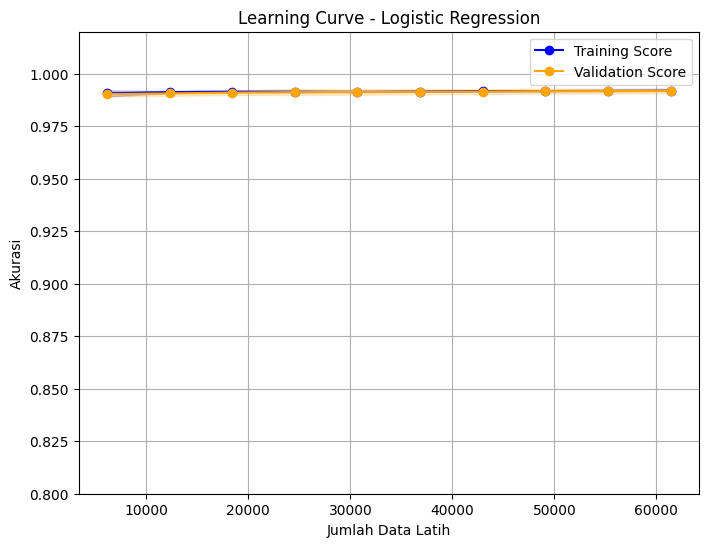

In [27]:
models = {
    "KNN": model_knn,
    "Random Forest": model_rf,
    "Naive Bayes": model_nb,
    "Logistic Regression": model_logistic
}

for name, model in models.items():
    plot_learning_curve(model, x_train_scaled, y_train, title=name)